<a href="https://colab.research.google.com/github/mcatrinque/area_cep_mg/blob/main/br_mg_ceps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Representação Geométrica das Áreas de CEP do Estado de Minas Gerais

##Adicionando Bibliotecas

In [ ]:
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj


##Download Arquivos Shapefile

###Polígonos CEP - MG

In [ ]:
#https://drive.google.com/file/d/1WoYTNoqJ7zHOhSdjj8aAtn9gtWmB8V1m/view?usp=sharing
!gdown --id "1WoYTNoqJ7zHOhSdjj8aAtn9gtWmB8V1m"
#https://drive.google.com/file/d/1Jm9wffohypuQtMvtjrfxG8q1zrWDhJcf/view?usp=sharing
!gdown --id "1Jm9wffohypuQtMvtjrfxG8q1zrWDhJcf"
#https://drive.google.com/file/d/1W1Aq102gLDFENibrUVbNkhYvnCSe_OJp/view?usp=sharing
!gdown --id "1W1Aq102gLDFENibrUVbNkhYvnCSe_OJp"
#https://drive.google.com/file/d/1scc8OmzYWZin6jbGtxhFyMGs2wXRyIcS/view?usp=sharing
!gdown --id "1scc8OmzYWZin6jbGtxhFyMGs2wXRyIcS"
path = '/content/'

Downloading...
From: https://drive.google.com/uc?id=1WoYTNoqJ7zHOhSdjj8aAtn9gtWmB8V1m
To: /content/br_mg_poligonos_ceps.prj
100% 151/151 [00:00<00:00, 238kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Jm9wffohypuQtMvtjrfxG8q1zrWDhJcf
To: /content/br_mg_poligonos_ceps.shp
100% 34.9M/34.9M [00:00<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W1Aq102gLDFENibrUVbNkhYvnCSe_OJp
To: /content/br_mg_poligonos_ceps.dbf
100% 30.0M/30.0M [00:00<00:00, 131MB/s]
Downloading...
From: https://drive.google.com/uc?id=1scc8OmzYWZin6jbGtxhFyMGs2wXRyIcS
To: /content/br_mg_poligonos_ceps.shx
100% 311k/311k [00:00<00:00, 10.4MB/s]


###Limites dos Municipios MG

In [ ]:
#https://drive.google.com/file/d/10etKZd9KUV47m_wm9EnqsFGXLp0Lc2dv/view?usp=sharing
!gdown --id "10etKZd9KUV47m_wm9EnqsFGXLp0Lc2dv"
#https://drive.google.com/file/d/1WExkYI1i6JrUw_sMkx2hGqzNwgz5wdsL/view?usp=sharing
!gdown --id "1WExkYI1i6JrUw_sMkx2hGqzNwgz5wdsL"
#https://drive.google.com/file/d/1O1Gja2X7CcbUQeuMp3Qa3yVlgRVXoD9O/view?usp=sharing
!gdown --id "1O1Gja2X7CcbUQeuMp3Qa3yVlgRVXoD9O"
#https://drive.google.com/file/d/18Do2b9uuY3MON8Z7ace_wF0erEIB7kUH/view?usp=sharing
!gdown --id "18Do2b9uuY3MON8Z7ace_wF0erEIB7kUH"

Downloading...
From: https://drive.google.com/uc?id=10etKZd9KUV47m_wm9EnqsFGXLp0Lc2dv
To: /content/br_mg_limites_municipios.dbf
100% 207k/207k [00:00<00:00, 11.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WExkYI1i6JrUw_sMkx2hGqzNwgz5wdsL
To: /content/br_mg_limites_municipios.shp
100% 48.5M/48.5M [00:00<00:00, 135MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O1Gja2X7CcbUQeuMp3Qa3yVlgRVXoD9O
To: /content/br_mg_limites_municipios.shx
100% 6.92k/6.92k [00:00<00:00, 6.74MB/s]
Downloading...
From: https://drive.google.com/uc?id=18Do2b9uuY3MON8Z7ace_wF0erEIB7kUH
To: /content/br_mg_limites_municipios.prj
100% 151/151 [00:00<00:00, 146kB/s]


###Poligonos CEP - BH

In [ ]:
#https://drive.google.com/file/d/1aqnDkgEKC45QmovK0Hk1costnSYSuPsS/view?usp=sharing
!gdown --id "1aqnDkgEKC45QmovK0Hk1costnSYSuPsS"
#https://drive.google.com/file/d/1C1iKbh06HTI8sLcYxBgjuwmoohtTfiFe/view?usp=sharing
!gdown --id "1C1iKbh06HTI8sLcYxBgjuwmoohtTfiFe"
#https://drive.google.com/file/d/1WP-myPEeiCz6-tTaViMpXEafW4txIs0X/view?usp=sharing
!gdown --id "1WP-myPEeiCz6-tTaViMpXEafW4txIs0X"
#https://drive.google.com/file/d/1pr3eUz86nt_0ysECgxBDqXjR8u-jrrbp/view?usp=sharing
!gdown --id "1pr3eUz86nt_0ysECgxBDqXjR8u-jrrbp"

Downloading...
From: https://drive.google.com/uc?id=1aqnDkgEKC45QmovK0Hk1costnSYSuPsS
To: /content/br_mg_bh_poligonos_ceps.prj
100% 151/151 [00:00<00:00, 185kB/s]
Downloading...
From: https://drive.google.com/uc?id=1C1iKbh06HTI8sLcYxBgjuwmoohtTfiFe
To: /content/br_mg_bh_poligonos_ceps.dbf
100% 287k/287k [00:00<00:00, 22.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WP-myPEeiCz6-tTaViMpXEafW4txIs0X
To: /content/br_mg_bh_poligonos_ceps.shx
100% 115k/115k [00:00<00:00, 9.04MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pr3eUz86nt_0ysECgxBDqXjR8u-jrrbp
To: /content/br_mg_bh_poligonos_ceps.shp
100% 6.55M/6.55M [00:00<00:00, 88.7MB/s]


###Limites Regionais BH

In [ ]:
#https://drive.google.com/file/d/1F2-9jbpOPKttjh552O769EzMsqD7P1Ve/view?usp=sharing
!gdown --id "1F2-9jbpOPKttjh552O769EzMsqD7P1Ve"
#https://drive.google.com/file/d/1km-XOlaonfsGmmkZqoyTCxgmW-ToqlgL/view?usp=sharing
!gdown --id "1km-XOlaonfsGmmkZqoyTCxgmW-ToqlgL"
#https://drive.google.com/file/d/1splo5MNUf1vltEOESZOoi3CO1rdfu-sH/view?usp=sharing
!gdown --id "1splo5MNUf1vltEOESZOoi3CO1rdfu-sH"
#https://drive.google.com/file/d/1sr1VLaEcbJ3OO-KNW2JeGXqwGWJ6bcE0/view?usp=sharing
!gdown --id "1sr1VLaEcbJ3OO-KNW2JeGXqwGWJ6bcE0"

Downloading...
From: https://drive.google.com/uc?id=1F2-9jbpOPKttjh552O769EzMsqD7P1Ve
To: /content/br_mg_bh_limites_regionais.shp
100% 411k/411k [00:00<00:00, 13.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1km-XOlaonfsGmmkZqoyTCxgmW-ToqlgL
To: /content/br_mg_bh_limites_regionais.shx
100% 108/108 [00:00<00:00, 172kB/s]
Downloading...
From: https://drive.google.com/uc?id=1splo5MNUf1vltEOESZOoi3CO1rdfu-sH
To: /content/br_mg_bh_limites_regionais.dbf
100% 229/229 [00:00<00:00, 397kB/s]
Downloading...
From: https://drive.google.com/uc?id=1sr1VLaEcbJ3OO-KNW2JeGXqwGWJ6bcE0
To: /content/br_mg_bh_limites_regionais.prj
100% 796/796 [00:00<00:00, 1.37MB/s]


## Coleta e Tratamento de Dados
O shapefile foi gerado a partir do agrupamento de unidades, residenciais e comerciais, em função do cep e da distância dos pontos de cada *cluster* para o seu centróide, e da junção com os CEPs cuja a área corresponde ao território do municpios. Os pontos georeferenciados do estado de Minas Gerais, foram obtidos em [OpenAddresses](https://batch.openaddresses.io/data) e os seus limites territoriais coletados de [Portal de Mapas - IBGE](https://portaldemapas.ibge.gov.br/portal.php). Já as referências de residências e comércios da capital mineira, foram coletadas do sistema [BHMAP - PBH](http://bhmap.pbh.gov.br/v2/mapa/idebhgeo), fornecido pela Prefeitura de Belo Horizonte. A partir dos pontos fornecidos pela base e tratados pelo processo descrito, foi possível estimar um envoltório convexo que determina-se os limites de área dos CEPs que não eram equivalente a área do município.

###Dados - MG

In [ ]:
# project GeoPandas dataframe
mg_area_cep = gpd.read_file(path + 'br_mg_poligonos_ceps.shp')
mg_area_cep.drop('id', axis=1, inplace=True)
mg_area_cep.drop('path', axis=1, inplace=True)
mg_area_cep.drop('layer', axis=1, inplace=True)
mg_area_cep.to_crs(pyproj.CRS.from_epsg(4674), inplace=True)
mg_area_cep.head()

,id,postcode,layer,path,geometry
0,0,31744-134,cep_bh_poligonos,dbname='mg_area_cep' host=localhost port=5432 ...,"POLYGON ((-43.94817 -19.82529, -43.94838 -19.8..."
1,1,31748-550,cep_bh_poligonos,dbname='mg_area_cep' host=localhost port=5432 ...,"POLYGON ((-43.92594 -19.80153, -43.92602 -19.8..."
2,2,30860-280,cep_bh_poligonos,dbname='mg_area_cep' host=localhost port=5432 ...,"POLYGON ((-44.00601 -19.91061, -44.00584 -19.9..."
3,3,30260-090,cep_bh_poligonos,dbname='mg_area_cep' host=localhost port=5432 ...,"POLYGON ((-43.91679 -19.92123, -43.91687 -19.9..."
4,4,31130-230,cep_bh_poligonos,dbname='mg_area_cep' host=localhost port=5432 ...,"POLYGON ((-43.94960 -19.88662, -43.94983 -19.8..."


In [ ]:
lim_municipal = gpd.read_file(path + 'br_mg_limites_municipios.shp')
lim_municipal.rename(columns={'NOME':'CIDADE'}, inplace=True)
lim_municipal.drop('ANODEREFER', axis=1, inplace=True)
lim_municipal.drop('LEICRIACAO', axis=1, inplace=True)
lim_municipal.head()

,CIDADE,GEOCODIGO,AREA,geometry
0,Munhoz,3143807,190.72,"LINESTRING (-46.40541 -22.61895, -46.40555 -22..."
1,Contagem,3118601,194.38,"LINESTRING (-44.02628 -19.90228, -44.02629 -19..."
2,Belo Horizonte,3106200,330.23,"LINESTRING (-43.95019 -19.98793, -43.95019 -19..."
3,Confins,3117876,41.67,"LINESTRING (-43.94228 -19.65750, -43.94232 -19..."
4,Lagoa Santa,3137601,229.45,"LINESTRING (-43.96842 -19.59981, -43.96862 -19..."


###Dados - BH

In [ ]:
# project GeoPandas dataframe
bh_area_cep = gpd.read_file(path + 'br_mg_bh_poligonos_ceps.shp')
bh_area_cep.to_crs(pyproj.CRS.from_epsg(4674), inplace=True)
bh_area_cep.head()

,id,cep,geometry
0,0,31744-134,"POLYGON ((-43.94817 -19.82529, -43.94838 -19.8..."
1,1,31748-550,"POLYGON ((-43.92594 -19.80153, -43.92602 -19.8..."
2,2,30860-280,"POLYGON ((-44.00601 -19.91061, -44.00584 -19.9..."
3,3,30260-090,"POLYGON ((-43.91679 -19.92123, -43.91687 -19.9..."
4,4,31130-230,"POLYGON ((-43.94960 -19.88662, -43.94983 -19.8..."


In [ ]:
lim_regional = gpd.read_file(path + 'br_mg_bh_limites_regionais.shp')
lim_regional.rename(columns={'AREA_KM2':'AREA'}, inplace=True)
lim_regional.rename(columns={'NOME':'REGIAO'}, inplace=True)
lim_regional.drop('ID_LM', axis=1, inplace=True)
lim_regional.drop('PERIMETR_M', axis=1, inplace=True)
lim_regional.head()

,AREA,geometry
0,330.23,"POLYGON ((609866.632 7789584.944, 609865.420 7..."


## Visualização e Análise
O que se pode observar depois das operações de tratamento e manipulação dos dados coletados, resultou em um arquivo, no formato shapefile, disponível no [Google Drive](https://drive.google.com/drive/folders/1GLgAKU3Ejle7BIYV8CYyG_siGLirDMgB?usp=sharing). Em relação aos polígonos gerados para a representação de área dos CEPs, é possível identificar os seguintes fenômenos:
*   A forma dos polígono em cidades com apenas um cep, pode ser definida pelos limites territoriais do município;
*   Cidades com alta concentração de CEPs, tendem a gerar geometrias disformes;
*   O formato dos CEPs nos grandes centros urbanos, tende a se aproximar do traçado de suas ruas.

Abaixo, seguem as visualizações que corroboram as inferências citadas:

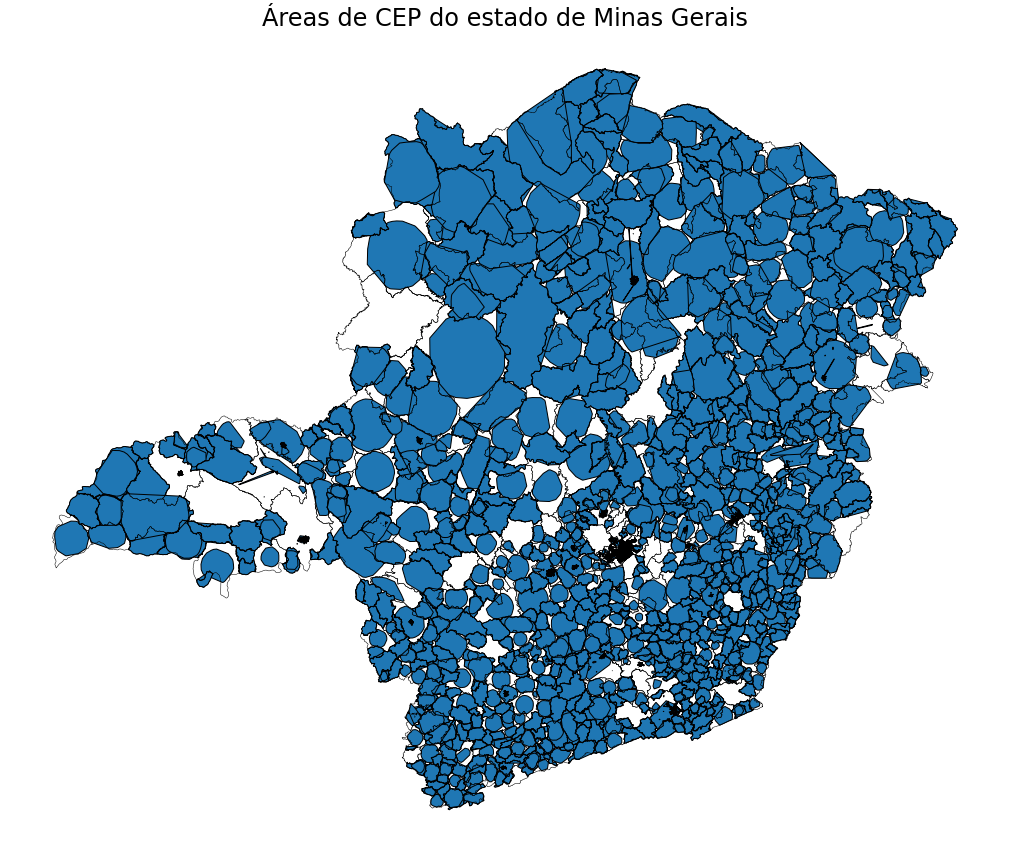

In [ ]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Áreas de CEP do estado de Minas Gerais", fontsize=24)
lim_municipal.plot(ax=gax,
                   edgecolor='black',
                   linewidth=0.5)
mg_area_cep.plot(ax=gax,
                   edgecolor='black',
                   linewidth=1)
plt.axis('off')
plt.show()

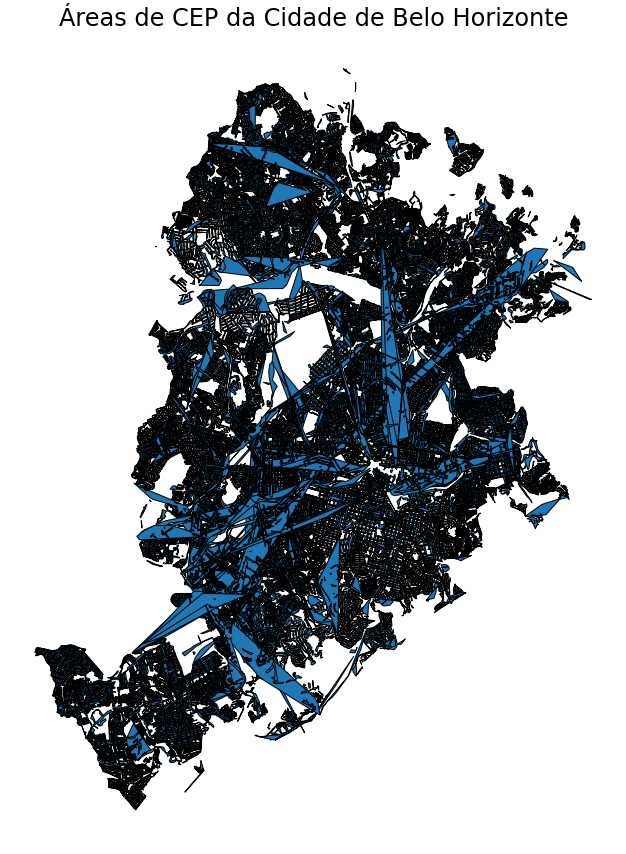

In [ ]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Áreas de CEP da Cidade de Belo Horizonte", fontsize=24)
bh_area_cep.plot(ax=gax,
                   edgecolor='black',
                   linewidth=1)
plt.axis('off')
plt.show()